<a href="https://colab.research.google.com/github/elsumensa/grafCFDPython/blob/main/GrPHcfd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

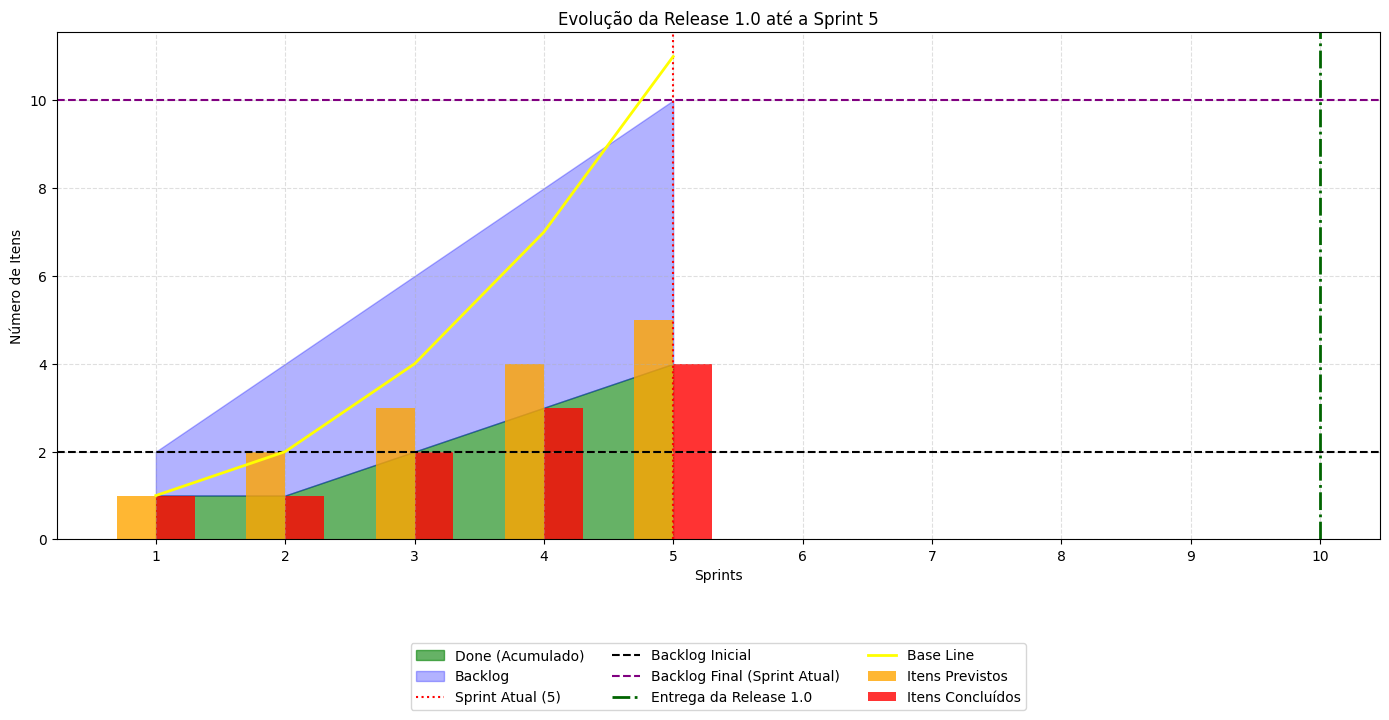

In [48]:
import matplotlib.pyplot as plt
import numpy as np

# ======================
# Configuração da Release
# ======================
release_name = "Release 1.0"
sprint_atual = 5

sprints = np.arange(1, 11)

# ======================
# Dados simulados até a sprint atual
# ======================
done =         [1, 1, 2, 3, 4]
staged =       [2, 4, 6, 8, 10]
in_progress =  [1, 2, 3, 4, 5]
backlog = staged #[s + ip for s, ip in zip(staged, in_progress)]

previstos =   in_progress
concluidos =  done
base_line =   [1, 2, 4, 7, 11]

x = sprints[:sprint_atual]

done_acumulado = done
backlog_acumulado = backlog #[d + b for d, b in zip(done, backlog)]

# ======================
# Construção do Gráfico
# ======================
plt.figure(figsize=(14, 7))

# Áreas empilhadas: Done e Backlog
plt.fill_between(x, 0, done_acumulado, label='Done (Acumulado)', color='green', alpha=0.6)
plt.fill_between(x, done_acumulado, backlog_acumulado, label='Backlog', color='blue', alpha=0.3)

# Barras: Previstos vs Concluídos por sprint
bar_width = 0.3
plt.bar(x - bar_width/2, previstos, bar_width, label='Itens Previstos', color='orange', alpha=0.8)
plt.bar(x + bar_width/2, concluidos, bar_width, label='Itens Concluídos', color='red', alpha=0.8)

plt.axvline(x=sprint_atual, color='red', linestyle=':', label=f'Sprint Atual ({sprint_atual})')

# Linha de backlog inicial
plt.axhline(y=backlog[0], color='black', linestyle='--', label='Backlog Inicial')

# Linha de backlog final
plt.axhline(y=backlog[-1], color='purple', linestyle='--', label='Backlog Final (Sprint Atual)')

# Linha da entrega da release
plt.axvline(x=10, color='darkgreen', linestyle='-.', linewidth=2, label=f'Entrega da {release_name}')

# Base Line
# Linha conectando os valores previstos (tendência)
plt.plot(sprints[:len(base_line)], base_line, color='yellow', linestyle='-', linewidth=2, label='Base Line')

# Linha Pessimista
#plt.plot(sprints[:len(base_line)], base_line, color='yellow', linestyle='-', linewidth=2, label='Base Line')

# Linha Otimista
#plt.plot(sprints[:len(base_line)], base_line, color='yellow', linestyle='-', linewidth=2, label='Base Line')

# Eixos e título
plt.xlabel("Sprints")
plt.ylabel("Número de Itens")
plt.title(f"Evolução da {release_name} até a Sprint {sprint_atual}")

# Mostrar todas as sprints no eixo X, mesmo que sem dados
plt.xticks(sprints)

# Legenda e ajustes visuais
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.35), ncol=3)
plt.grid(True, linestyle='--', alpha=0.4)
plt.subplots_adjust(bottom=0.25, top=0.85)
plt.tight_layout()
plt.show()
